<a href="https://colab.research.google.com/github/Sedzay/les4/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv("/content/sample_data/bestsellers with categories.csv")

In [2]:
#Виведіть перші п'ять рядків (використовується функція head)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
#Виведіть розміри датасету (використовуйте атрибут shape)
df.shape

(550, 7)

In [4]:
#Відповідь: Про скільки книг зберігає дані датасет?
print(df.shape[0])

550


In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
#Перевірте, чи у всіх рядків вистачає даних:
#виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
print(df.isna().sum())
#Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
#ні

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [7]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
print(df['genre'].unique())
#Відповідь: Які є унікальні жанри?
# Non Fiction, Fiction

['Non Fiction' 'Fiction']


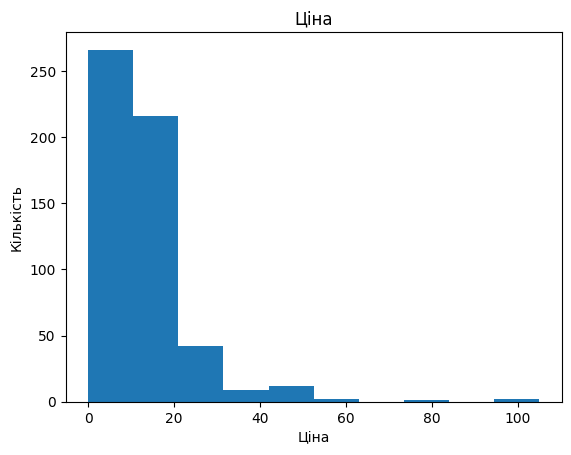

In [8]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
import matplotlib.pyplot as plt

df['price'].plot(kind='hist')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.title('Ціна')
plt.show()

In [9]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна
#(використовуйте функції max, min, mean, median)
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

In [10]:
#Відповідь: Максимальна ціна?
print(max_price)
#Відповідь: Мінімальна ціна?
print(min_price)
#Відповідь: Середня ціна?
print(mean_price)
#Відповідь: Медіанна ціна?
print(median_price)

105
0
13.1
11.0


In [11]:
#Відповідь: Який рейтинг у датасеті найвищий? Відповідь:
max_rating = df['user_rating'].max()
print(max_rating)

4.9


In [12]:
#Відповідь: Скільки книг мають такий рейтинг? Відповідь:
books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(books_with_max_rating)

52


In [13]:
#Відповідь: Яка книга має найбільше відгуків? Відповідь:
# максимальну кількість відгуків
max_reviews = df['reviews'].max()

# рядок з найбільшою кількістю відгуків
book_with_max_reviews = df[df['reviews'] == max_reviews].iloc[0]
print(book_with_max_reviews)

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


In [14]:
#Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році,
#яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
# Відфільтрувую книги за роком і місцем в рейтингу
books_2015 = df[df['year'] == 2015]
top_50_2015 = books_2015.sort_values(by='user_rating').head(50)
#print(top_50_2015)
# Знаходжу найдорожчу книгу серед відфільтрованих
most_expensive_book = top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()].iloc[0]
print(most_expensive_book)


name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object


In [15]:
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
books_2010_Fiction = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
print(len(books_2010_Fiction))

20


In [16]:
#Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках
#(використовуйте | або функцію isin)?
books_2010_2011_rating_4_9 = df[(df['year'].isin([2010, 2011])) & (df['user_rating'] == 4.9)]
print(len(books_2010_2011_rating_4_9))

1


In [17]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році
#і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
#Відповідь:
books_2015_less_than_8 = df[(df['year'] == 2015) & (df['price'] < 8)]
sort_up_2015 = books_2015_less_than_8.sort_values(by='price')
print(sort_up_2015)


                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [18]:
#Яка книга остання у відсортованому списку? Відповідь:
last_book = sort_up_2015.iloc[-1]
print(last_book)

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object


In [19]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів
#(використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min).
#Не беріть усі стовпці, виберіть тільки потрібні вам
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])

In [20]:
#Відповідь: Максимальна ціна для жанру Fiction: Відповідь
print(genre_prices.loc['Fiction', 'max'])
#Відповідь: Мінімальна ціна для жанру Fiction: Відповідь
print(genre_prices.loc['Fiction', 'min'])
#Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь
print(genre_prices.loc['Non Fiction', 'max'])
#Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь
print(genre_prices.loc['Non Fiction', 'min'])

82
0
105
0


In [21]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів
#(використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
#Не беріть усі стовпці, виберете тільки потрібні

# Групую дані за автором і обчислюю кількість книг для кожного автора
author_books_count = df.groupby('author')['name'].count()
# Створюю новий датафрейм з результатами
author_books_df = pd.DataFrame(author_books_count)
# Перейменовую стовпець
author_books_df.rename(columns={'name': 'books_count'}, inplace=True)

In [22]:
#Відповідь: Якої розмірності вийшла таблиця? Відповідь:
print(author_books_df.shape)
#Відповідь: Який автор має найбільше книг? Відповідь:
print(author_books_df.idxmax()[0])
#Відповідь: Скільки книг цього автора? Відповідь:
print(author_books_df.max()[0])

(248, 1)
Jeff Kinney
12


In [23]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
 #(використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
 #Не беріть усі стовпці, виберете тільки потрібні
# Групую дані за автором і обчислюю середній рейтинг для кожного автора
author_avg_rating = df.groupby('author')['user_rating'].mean()
# Створюю новий датафрейм з результатами
author_avg_rating_df = pd.DataFrame(author_avg_rating)



In [24]:
#Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:
print(author_avg_rating_df.idxmin()[0])
#Відповідь: Який у цього автора середній рейтинг? Відповідь:
print(author_avg_rating_df.min()[0])

Donna Tartt
3.9


In [25]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
#(Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
merged_df = pd.concat([author_books_df, author_avg_rating_df], axis=1)
print(merged_df)

                            books_count  user_rating
author                                              
Abraham Verghese                      2     4.600000
Adam Gasiewski                        1     4.400000
Adam Mansbach                         1     4.800000
Adir Levy                             1     4.800000
Admiral William H. McRaven            1     4.700000
...                                 ...          ...
Walter Isaacson                       3     4.566667
William Davis                         2     4.400000
William P. Young                      2     4.600000
Wizards RPG Team                      3     4.800000
Zhi Gang Sha                          2     4.600000

[248 rows x 2 columns]


In [26]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом
#(використовуйте функцію sort_values)
sorted_df = merged_df.sort_values(by=['books_count', 'user_rating'])
print(sorted_df)

                                    books_count  user_rating
author                                                      
Muriel Barbery                                1     4.000000
Chris Cleave                                  1     4.100000
Ian K. Smith M.D.                             1     4.100000
Pierre Dukan                                  1     4.100000
Elizabeth Strout                              1     4.200000
...                                         ...          ...
American Psychological Association           10     4.500000
Suzanne Collins                              11     4.663636
Gary Chapman                                 11     4.736364
Rick Riordan                                 11     4.772727
Jeff Kinney                                  12     4.800000

[248 rows x 2 columns]


In [27]:
#Відповідь: Який автор перший у списку?
print(sorted_df.iloc[0])

books_count    1.0
user_rating    4.0
Name: Muriel Barbery, dtype: float64


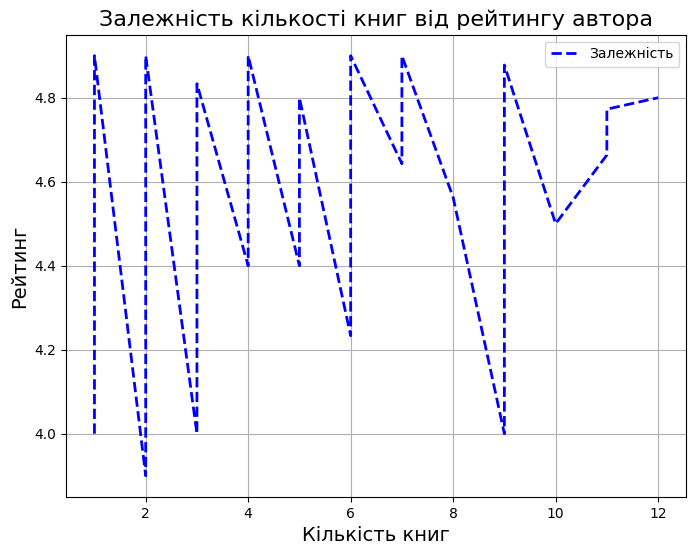

In [31]:
import numpy as np
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8, 6))  # Задаємо розмір графіка
plt.plot(sorted_df['books_count'], sorted_df['user_rating'], color='blue', linestyle='--', linewidth=2, label='Залежність')
plt.title('Залежність кількості книг від рейтингу автора', fontsize=16)
plt.xlabel('Кількість книг', fontsize=14)
plt.ylabel('Рейтинг', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

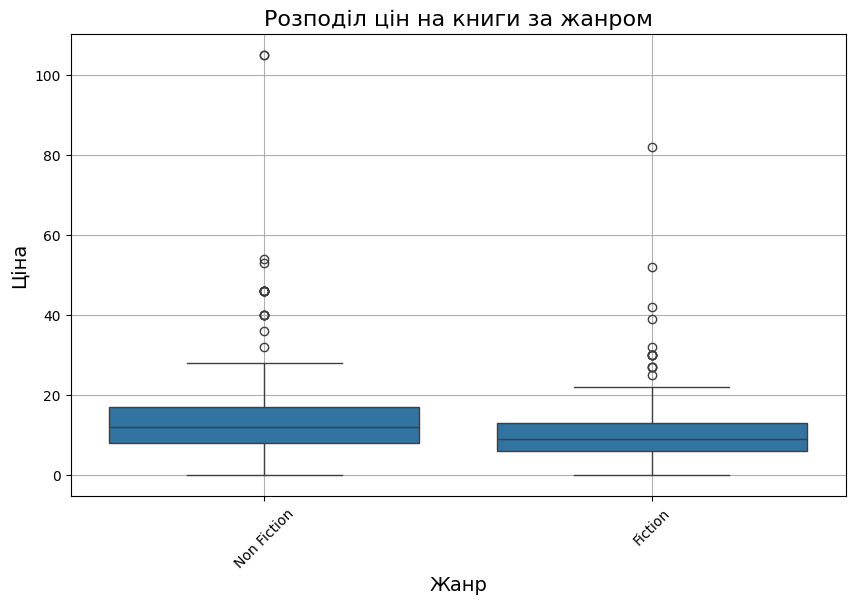

In [34]:
# Побудова стовпчикової діаграми розподілу цін книг за жанром
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='genre', y='price')
plt.title('Розподіл цін на книги за жанром', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Ціна', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

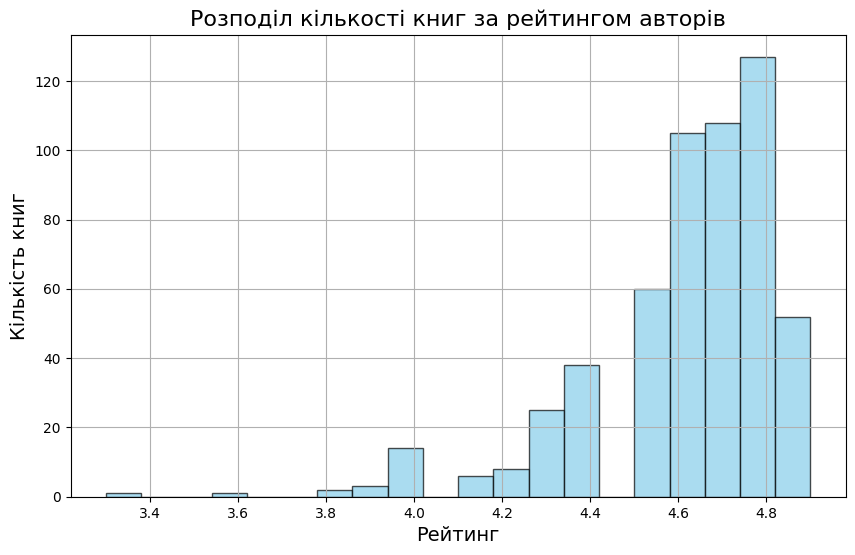

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['user_rating'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Розподіл кількості книг за рейтингом авторів', fontsize=16)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Кількість книг', fontsize=14)
plt.grid(True)
plt.show()